In [13]:
#Trabajo Practico n2
#Region-Patagonia
#Parte I
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Desde la ubicacion de los archivos copiamos los codigo de ruta y cargamos las bases de datos
df_2004 = pd.read_stata(r"C:\Users\facun\OneDrive\Documentos\usu_individual_T104.dta")
df_2024 = pd.read_excel(r"C:\Users\facun\OneDrive\Documentos\usu_individual_T124.xlsx.xlsx")

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Ya que la Patagonia es la region elegida buscamos su correcta denominacion y filtramos
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004 = df_2004[df_2004['REGION'] == 'Patagónica']
df_2024 = df_2024[df_2024['REGION'] == '43']  

# Agregamos ambas columnas con su correspondiente año
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

# Seleccionar variables comunes elegidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH08', 
    'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# En este paso nos aseguramos que estas variables sean numericas
numeric_vars = ['CH06', 'IPCF', 'P21', 'P47T']
for var in numeric_vars:
    if var in df_2004.columns:
        df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    if var in df_2024.columns:
        df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

# Unimos ambas bases de datos en una sola llamada df_combinado
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

# Aqui contamos la cantidad de veces que aparecen los valores
print("Conteo de observaciones por año:")
print(df_combinado['ANO4'].value_counts())

# Análisis de valores faltantes
valores_faltantes = df_combinado[variables_seleccionadas].isna().sum()
print("Valores faltantes por variable:")
print(valores_faltantes)

# Agrupamos datos por años y contamos sus valores
faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())
faltantes_por_anio = faltantes_por_anio.transpose()

#A partir de aqui realizamos una limpieza de datos negativos y los cambiamos por NaN para luego visuualizarlo

print("Valores faltantes por año:")
print(faltantes_por_anio)

df_combinado['P47T'] = df_combinado['P47T'].apply(lambda x: x if x is None or x >= 0 else np.nan)
df_combinado['IPCF'] = df_combinado['IPCF'].apply(lambda x: x if x is None or x >= 0 else np.nan)

print("Cantidad de valores NaN en ingresos después de limpiar:")
print("P47T:", df_combinado['P47T'].isna().sum())
print("IPCF:", df_combinado['IPCF'].isna().sum())

Conteo de observaciones por año:
ANO4
2024    14410
2004     3264
Name: count, dtype: int64
Valores faltantes por variable:
P47T            15
IPCF             0
CH04             0
CH06            51
CH08             0
P21              0
CAT_INAC         0
PP04D_COD     8108
PP04A         8108
TRIMESTRE        0
REGION           0
AGLOMERADO       0
IDECCFR          0
ANO4             0
ESTADO           0
dtype: int64
Valores faltantes por año:
ANO4        2004  2024
P47T           0    15
IPCF           0     0
CH04           0     0
CH06          51     0
CH08           0     0
P21            0     0
CAT_INAC       0     0
PP04D_COD      0  8108
PP04A          0  8108
TRIMESTRE      0     0
REGION         0     0
AGLOMERADO     0     0
IDECCFR        0     0
ANO4           0     0
ESTADO         0     0
Cantidad de valores NaN en ingresos después de limpiar:
P47T: 2040
IPCF: 0


C:\Users\facun\AppData\Local\Temp\ipykernel_19340\3845144415.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())


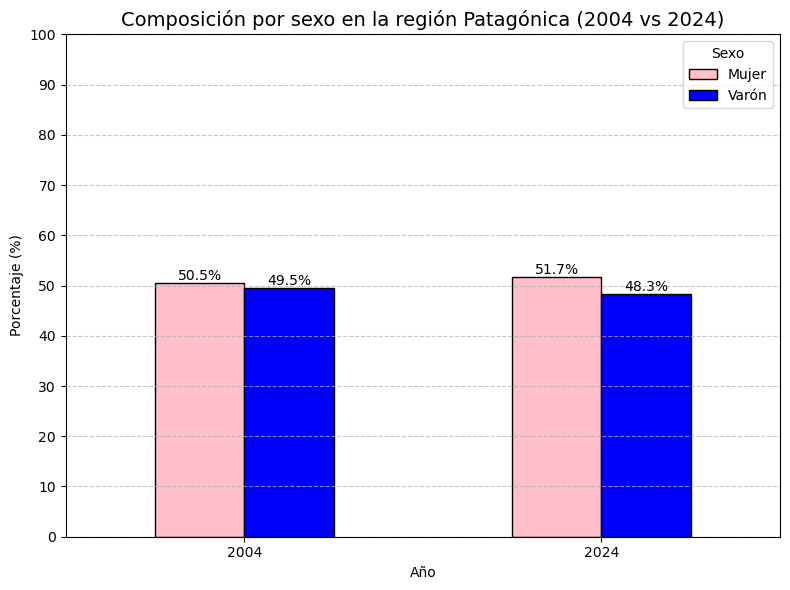

In [17]:
#PARTE II

import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar los valores de CH04 -genero- por etiquetas
df_combinado['CH04'] = df_combinado['CH04'].replace({1: 'Varón', 2: 'Mujer'})

# Agrupamos por años trabajados y genero
sexo_agrupado = df_combinado.groupby(['ANO4', 'CH04']).size().unstack()

# Calculamos porcentajes de los años
sexo_porcentaje = sexo_agrupado.div(sexo_agrupado.sum(axis=1), axis=0) * 100

# Creamos el grafico a medida y color que querramos
ax = sexo_porcentaje.plot(kind='bar', figsize=(8, 6), color=['pink', 'blue'], edgecolor='black')

# Agregamos etiquetas y titulos
plt.title('Composición por sexo en la región Patagónica (2004 vs 2024)', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(0, 101, 10))  # Porcentajes de 10 en 10
plt.legend(title='Sexo')
plt.tight_layout()

# Agregar etiquetas de porcentaje en cada barra para un mejor analisis
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)


plt.show()


In [25]:
#Parte II EJ 4.
#Antes de realizar este ejercicio adaptamos a nuestra variables anteriormente trabjadas las nuevas pedidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH07', 'CH08',
    'NIVEL_ED', 'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# Unimos los data sets de las nuevas variables con las anteriores
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

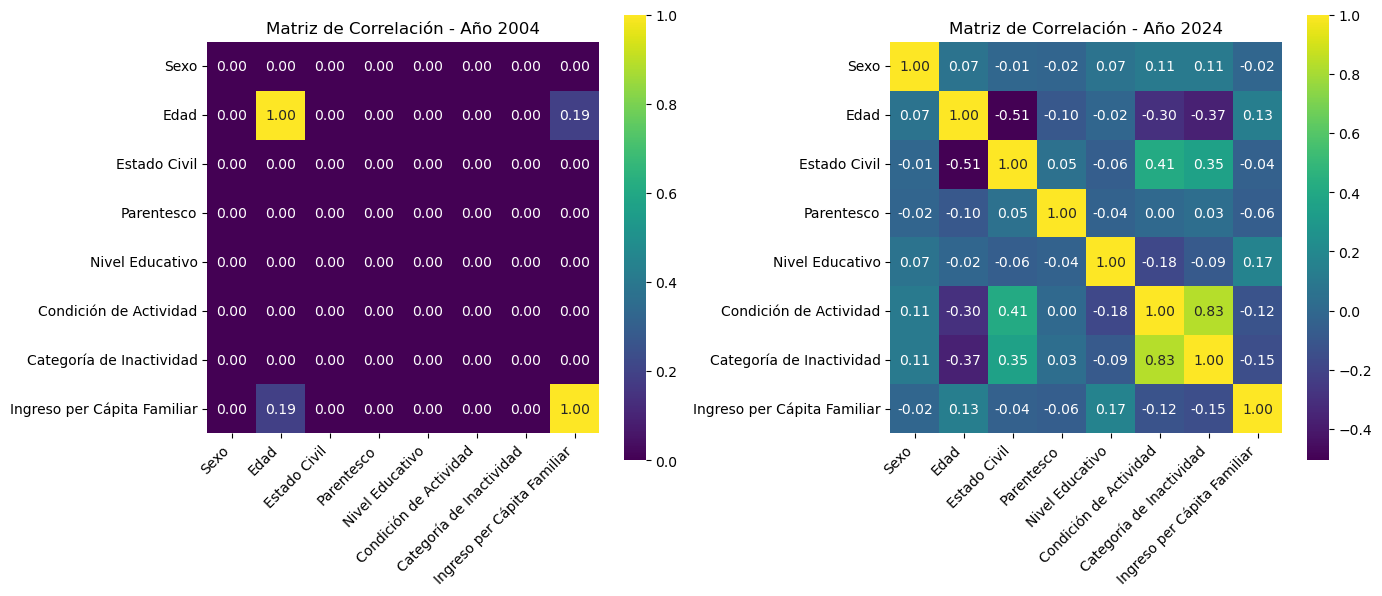

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agregamos los nombres de las variables para un mejor analisis
nombres_variables = {
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'CH07': 'Estado Civil',
    'CH08': 'Parentesco',
    'NIVEL_ED': 'Nivel Educativo',
    'ESTADO': 'Condición de Actividad',
    'CAT_INAC': 'Categoría de Inactividad',
    'IPCF': 'Ingreso per Cápita Familiar'
}

# Correlacionamos las variables trabajdas
variables_correlacion = list(nombres_variables.keys())

# Nos aseguramos que dichas variables sean numericas
for var in variables_correlacion:
    if var in df_combinado.columns:
        df_combinado[var] = pd.to_numeric(df_combinado[var], errors='coerce')

# Preparamos la función que filtra, renombra y completa NaNs en correlación
def preparar_matriz_correlacion(df, year):
    df_filtrado = df[df['ANO4'] == year][variables_correlacion].rename(columns=nombres_variables)
    corr = df_filtrado.corr().fillna(0)  # Al haber muchos valores faltantes rellenamos en el mapa los NaN con 0
    return corr

# Generamos las matrices de los años
corr_2004 = preparar_matriz_correlacion(df_combinado, 2004)
corr_2024 = preparar_matriz_correlacion(df_combinado, 2024)

# Graficamos el heatmaps pedido 
plt.figure(figsize=(14, 6))

# Año 2004
plt.subplot(1, 2, 1)
sns.heatmap(corr_2004, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Año 2004')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Año 2024
plt.subplot(1, 2, 2)
sns.heatmap(corr_2024, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación - Año 2024')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


PARTE III


In [1]:
import pandas as pd

# --- Carga y preparación de datos (Asegúrate de que esta parte se ejecute correctamente
# --- con las rutas correctas a tus archivos) ---
try:
    df_2004 = pd.read_stata(r"/Users/dstn/Downloads/Individual_t104.dta")
    df_2024 = pd.read_excel(r"/Users/dstn/Downloads/usu_individual_T124.xlsx")
except FileNotFoundError:
    print("Error: No se encontraron los archivos de datos. Verifica las rutas.")
    exit()

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Filtrar por la región de la Patagonia
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004_patagonia = df_2004[df_2004['REGION'] == 'Patagónica'].copy()
df_2024_patagonia = df_2024[df_2024['REGION'] == '43'].copy()

# Agregar la columna de año
df_2004_patagonia['ANO4'] = 2004
df_2024_patagonia['ANO4'] = 2024

# Seleccionar las variables necesarias para la pregunta 5
variables_seleccionadas_5_2004 = ['ESTADO', 'IPCF']
variables_seleccionadas_5_2024 = ['ESTADO', 'IPCF']

# Asegurarse de que las columnas existan en los DataFrames antes de la selección
df_2004_pregunta5 = df_2004_patagonia[
    [col for col in variables_seleccionadas_5_2004 if col in df_2004_patagonia.columns]
].copy()
df_2024_pregunta5 = df_2024_patagonia[
    [col for col in variables_seleccionadas_5_2024 if col in df_2024_patagonia.columns]
].copy()

# Combinar los DataFrames de ambos años para el análisis de la pregunta 5
df_combinado_pregunta5 = pd.concat([df_2004_pregunta5, df_2024_pregunta5], ignore_index=True)

# --- Pregunta 5: ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
# --- ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)? ---
print("\n--- Pregunta 5 ---")

# Conteo de personas por estado
conteo_estados = df_combinado_pregunta5['ESTADO'].value_counts()
print("\nConteo de personas por estado (Patagonia 2004 y 2024 combinados):\n", conteo_estados)

# Asumiendo la siguiente codificación de 'ESTADO':
# 1 = Ocupado
# 2 = Desocupado
# 3 = Inactivo

desocupados = conteo_estados.get(2, 0)
inactivos = conteo_estados.get(3, 0)
print(f"\nNúmero total de desocupados en la muestra de la Patagonia (2004 y 2024): {desocupados}")
print(f"Número total de inactivos en la muestra de la Patagonia (2004 y 2024): {inactivos}")

# Media de IPCF por estado
media_ipcf_por_estado = df_combinado_pregunta5.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (Patagonia 2004 y 2024 combinados):\n", media_ipcf_por_estado)

# --- Análisis separado por año (opcional) ---
print("\n--- Análisis por año (opcional) ---")

print("\nConteo de personas por estado (Patagonia 2004):")
print(df_2004_pregunta5['ESTADO'].value_counts())
print("\nMedia de IPCF por estado (Patagonia 2004):")
print(df_2004_pregunta5.groupby('ESTADO')['IPCF'].mean())

print("\nConteo de personas por estado (Patagonia 2024):")
print(df_2024_pregunta5['ESTADO'].value_counts())
print("\nMedia de IPCF por estado (Patagonia 2024):")
print(df_2024_pregunta5.groupby('ESTADO')['IPCF'].mean())


--- Pregunta 5 ---

Conteo de personas por estado (Patagonia 2004 y 2024 combinados):
 ESTADO
1                   6302
3                   5909
4                   1731
Inactivo            1307
Ocupado             1238
Menor de 10 años     600
2                    453
Desocupado           119
0                     15
Name: count, dtype: int64

Número total de desocupados en la muestra de la Patagonia (2004 y 2024): 453
Número total de inactivos en la muestra de la Patagonia (2004 y 2024): 5909

Media de IPCF por estado (Patagonia 2004 y 2024 combinados):
 ESTADO
0                        0.000000
1                   179600.563797
2                    99393.792848
3                   137703.875421
4                   109606.266626
Desocupado             225.452935
Inactivo               364.990445
Menor de 10 años       297.985339
Ocupado                551.186902
Name: IPCF, dtype: float64

--- Análisis por año (opcional) ---

Conteo de personas por estado (Patagonia 2004):
ESTADO
Inac

/var/folders/yl/fmp850sd01d7gtrsds9m9mvc0000gn/T/ipykernel_11665/3228295772.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_2004_pregunta5.groupby('ESTADO')['IPCF'].mean())


In [9]:
import pandas as pd

# --- Asumiendo que ya tienes el DataFrame 'df_combinado' creado (con los datos de 2004 y 2024 unidos) ---
# Si no es así, asegúrate de ejecutar la sección de carga y preparación de datos de tu código primero.

# --- Pregunta 6: ¿Cuántas personas no respondieron cuál es su condición de actividad?
# --- Guarden como una base distinta llamada respondieron las observaciones donde respondieron
# --- la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0
# --- guárdenlas en una base bajo el nombre norespondieron. ---
print("\n--- Pregunta 6: Análisis de las no respuestas en la condición de actividad ---")

# Identificar las observaciones donde 'ESTADO' es igual a 0 (no respondieron)
df_norespondieron = df_combinado[df_combinado['ESTADO'] == 0].copy()

# Identificar las observaciones donde 'ESTADO' no es igual a 0 (sí respondieron)
df_respondieron = df_combinado[df_combinado['ESTADO'] != 0].copy()

# Contar la cantidad de personas que no respondieron
cantidad_no_respondieron = len(df_norespondieron)
print(f"\nNúmero de personas que no respondieron a la pregunta sobre su condición de actividad (ESTADO=0): {cantidad_no_respondieron}")

# Mostrar información sobre los DataFrames creados
print("\nDataFrame 'respondieron' creado con {} observaciones.".format(len(df_respondieron)))
print("DataFrame 'norespondieron' creado con {} observaciones.".format(len(df_norespondieron)))


--- Pregunta 6: Análisis de las no respuestas en la condición de actividad ---

Número de personas que no respondieron a la pregunta sobre su condición de actividad (ESTADO=0): 15

DataFrame 'respondieron' creado con 17659 observaciones.
DataFrame 'norespondieron' creado con 15 observaciones.


In [15]:
print("\nValores únicos de 'ESTADO' en df_respondieron por año:")
print(df_respondieron.groupby('ANO4')['ESTADO'].unique())

print("\nConteo de valores de 'ESTADO' en df_respondieron para 2004:")
print(df_respondieron[df_respondieron['ANO4'] == 2004]['ESTADO'].value_counts())

print("\nConteo de valores de 'ESTADO' en df_respondieron para 2024:")
print(df_respondieron[df_respondieron['ANO4'] == 2024]['ESTADO'].value_counts())


Valores únicos de 'ESTADO' en df_respondieron por año:
ANO4
2004    [Ocupado, Inactivo, Menor de 10 años, Desocupado]
2024                                         [1, 2, 3, 4]
Name: ESTADO, dtype: object

Conteo de valores de 'ESTADO' en df_respondieron para 2004:
ESTADO
Inactivo            1307
Ocupado             1238
Menor de 10 años     600
Desocupado           119
Name: count, dtype: int64

Conteo de valores de 'ESTADO' en df_respondieron para 2024:
ESTADO
1    6302
3    5909
4    1731
2     453
Name: count, dtype: int64


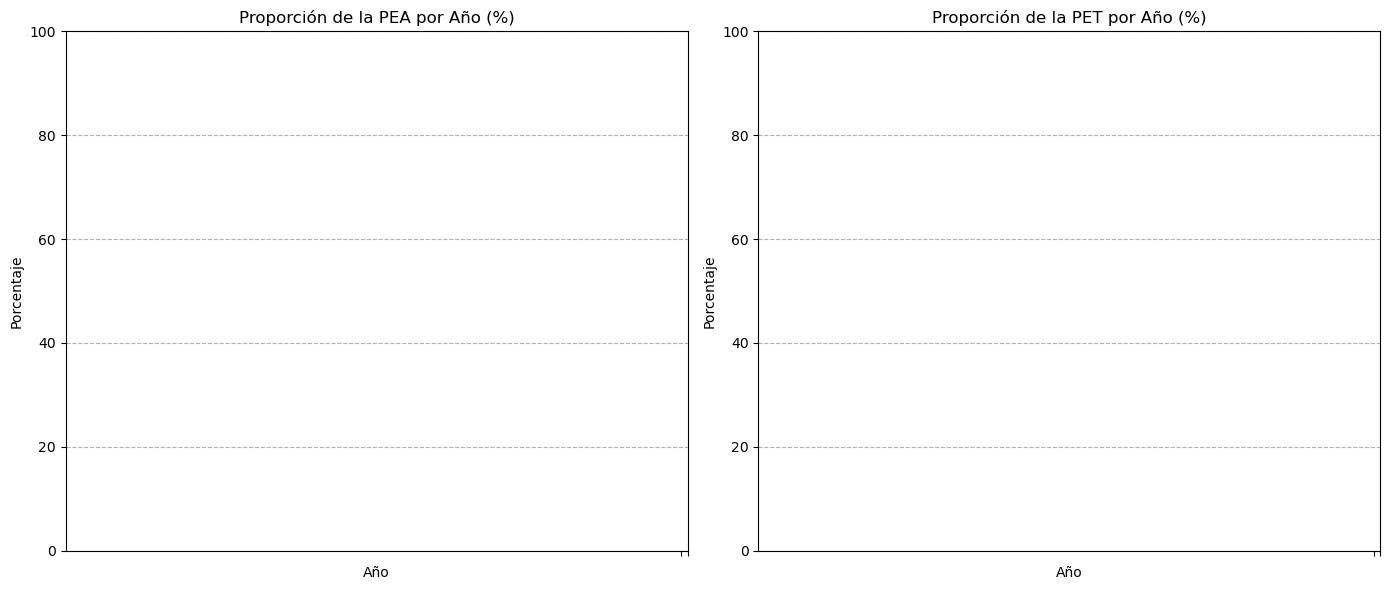


Proporción de la PEA por año (%):
 ANO4
2004     0.000000
2024    46.877169
Name: PEA, dtype: float64

Proporción de la PET por año (%):
 ANO4
2004    66.237745
2024    67.029840
Name: PET, dtype: float64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asumiendo que ya tienes el DataFrame 'df_combinado' creado ---
# Si no es así, asegúrate de ejecutar la sección de carga y preparación de datos primero.

# --- Crear la columna PEA ---
def es_pea(estado):
    if estado in [1, 2]:  # Asumiendo 1=Ocupado, 2=Desocupado
        return 1
    else:
        return 0

df_combinado['PEA'] = df_combinado['ESTADO'].apply(es_pea)
pea_proporcion_anual = df_combinado.groupby('ANO4')['PEA'].mean() * 100

# --- Crear la columna PET ---
def es_pet(edad):
    if 15 <= edad <= 65:
        return 1
    else:
        return 0

df_combinado['PET'] = df_combinado['CH06'].apply(es_pet)
pet_proporcion_anual = df_combinado.groupby('ANO4')['PET'].mean() * 100

# --- Gráficos PEA y PET ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de PEA
sns.barplot(x=pea_proporcion_anual.index, y=pea_proporcion_anual.values, hue=pea_proporcion_anual.index, ax=axes[0], palette="viridis", legend=False)
axes[0].set_title("Proporción de la PEA por Año (%)")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Porcentaje")
axes[0].set_xticks([2004, 2024])
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--')

# Gráfico de PET
sns.barplot(x=pet_proporcion_anual.index, y=pet_proporcion_anual.values, hue=pet_proporcion_anual.index, ax=axes[1], palette="mako", legend=False)
axes[1].set_title("Proporción de la PET por Año (%)")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Porcentaje")
axes[1].set_xticks([2004, 2024])
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("\nProporción de la PEA por año (%):\n", pea_proporcion_anual)
print("\nProporción de la PET por año (%):\n", pet_proporcion_anual)

In [39]:
print("Valores únicos de 'ESTADO' por año:")
print(df_combinado.groupby('ANO4')['ESTADO'].unique())

print("\nConteo de valores de 'ESTADO' en 2004:")
print(df_combinado[df_combinado['ANO4'] == 2004]['ESTADO'].value_counts())

print("\nConteo de valores de 'ESTADO' en 2024:")
print(df_combinado[df_combinado['ANO4'] == 2024]['ESTADO'].value_counts())

Valores únicos de 'ESTADO' por año:
ANO4
2004    [Ocupado, Inactivo, Menor de 10 años, Desocupado]
2024                                      [1, 2, 3, 4, 0]
Name: ESTADO, dtype: object

Conteo de valores de 'ESTADO' en 2004:
ESTADO
Inactivo            1307
Ocupado             1238
Menor de 10 años     600
Desocupado           119
Name: count, dtype: int64

Conteo de valores de 'ESTADO' en 2024:
ESTADO
1    6302
3    5909
4    1731
2     453
0      15
Name: count, dtype: int64


In [43]:
def es_pea(estado):
    if estado in [1, 2] or estado in [5, 6]:  # Ajusta los códigos de 2004 según tu investigación
        return 1
    else:
        return 0

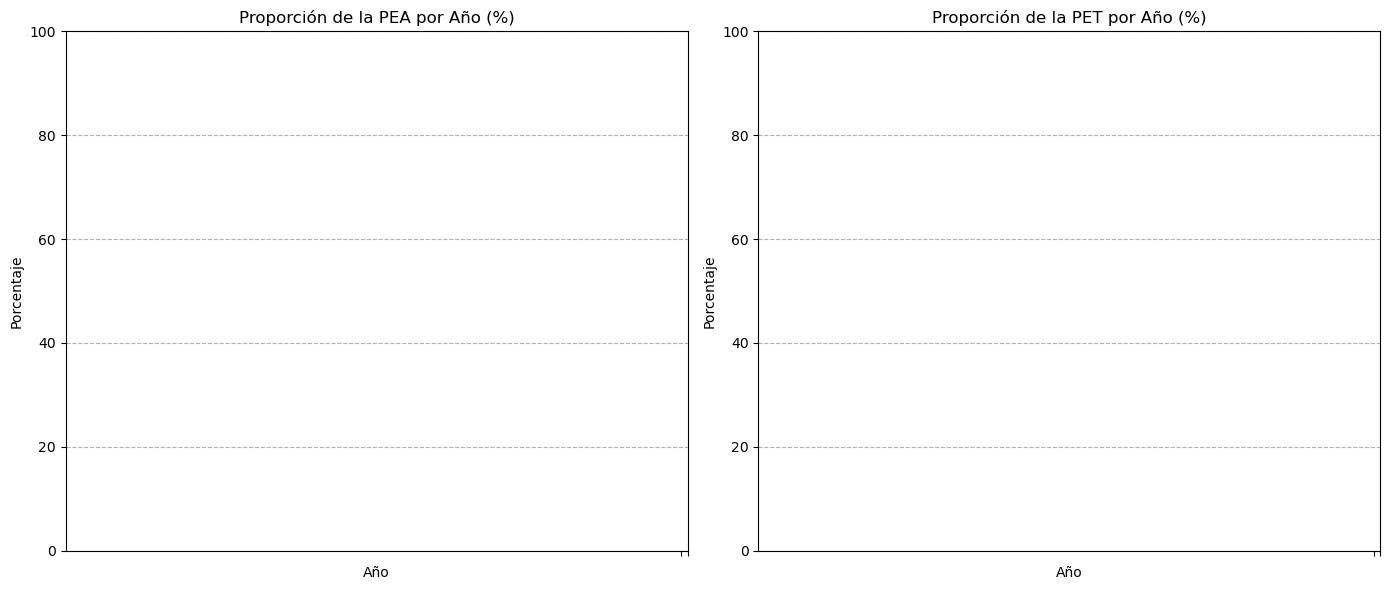


Proporción de la PEA por año (%):
 ANO4
2004     0.000000
2024    46.877169
Name: PEA, dtype: float64

Proporción de la PET por año (%):
 ANO4
2004    66.237745
2024    67.029840
Name: PET, dtype: float64


In [45]:
df_combinado['PET'] = df_combinado['CH06'].apply(es_pet)
pet_proporcion_anual = df_combinado.groupby('ANO4')['PET'].mean() * 100

# --- Gráficos PEA y PET ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de PEA
sns.barplot(x=pea_proporcion_anual.index, y=pea_proporcion_anual.values, hue=pea_proporcion_anual.index, ax=axes[0], palette="viridis", legend=False)
axes[0].set_title("Proporción de la PEA por Año (%)")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Porcentaje")
axes[0].set_xticks([2004, 2024])
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--')

# Gráfico de PET
sns.barplot(x=pet_proporcion_anual.index, y=pet_proporcion_anual.values, hue=pet_proporcion_anual.index, ax=axes[1], palette="mako", legend=False)
axes[1].set_title("Proporción de la PET por Año (%)")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Porcentaje")
axes[1].set_xticks([2004, 2024])
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("\nProporción de la PEA por año (%):\n", pea_proporcion_anual)
print("\nProporción de la PET por año (%):\n", pet_proporcion_anual)

In [47]:
print(df_combinado['ESTADO'].dtype)

object


In [49]:
df_combinado['ESTADO'] = pd.to_numeric(df_combinado['ESTADO'], errors='coerce').fillna(-99).astype(int) # Ajusta según tus datos

In [51]:
df_combinado['ESTADO'] = pd.to_numeric(df_combinado['ESTADO'], errors='coerce').fillna(-99).astype(int) # Ajusta según tus datos

In [53]:
print(df_combinado[df_combinado['ANO4'] == 2004]['ESTADO'].isnull().sum())

0


In [55]:
print(df_combinado[df_combinado['ANO4'] == 2004].head())

     P47T    IPCF   CH04  CH06                      CH08     P21     CAT_INAC  \
0  1000.0  1000.0  Varón  34.0  No paga ni le descuentan  1000.0          0.0   
1  1200.0   600.0  Varón  62.0  No paga ni le descuentan  1200.0          0.0   
2     0.0   600.0  Mujer  58.0  No paga ni le descuentan     0.0  Ama de casa   
3  1400.0   280.0  Varón  38.0  No paga ni le descuentan  1200.0          0.0   
4     0.0   280.0  Mujer  35.0  No paga ni le descuentan     0.0  Ama de casa   

  PP04D_COD        PP04A       TRIMESTRE      REGION  \
0     72113  ...privada?  1er. Trimestre  Patagónica   
1     72113  ...privada?  1er. Trimestre  Patagónica   
2                    0.0  1er. Trimestre  Patagónica   
3     72112  ...privada?  1er. Trimestre  Patagónica   
4                    0.0  1er. Trimestre  Patagónica   

                        AGLOMERADO IDECCFR  ANO4  ESTADO  PEA  PET  
0  Comodoro Rivadavia - Rada Tilly      10  2004     -99    0    1  
1  Comodoro Rivadavia - Rada Tilly    

In [57]:
print(df_combinado[df_combinado['ANO4'] == 2004]['PEA'].value_counts(dropna=False))

PEA
0    3264
Name: count, dtype: int64


In [67]:
print(df_combinado[df_combinado['ANO4'] == 2004]['PET'].value_counts(dropna=False))

PET
1    2162
0    1102
Name: count, dtype: int64


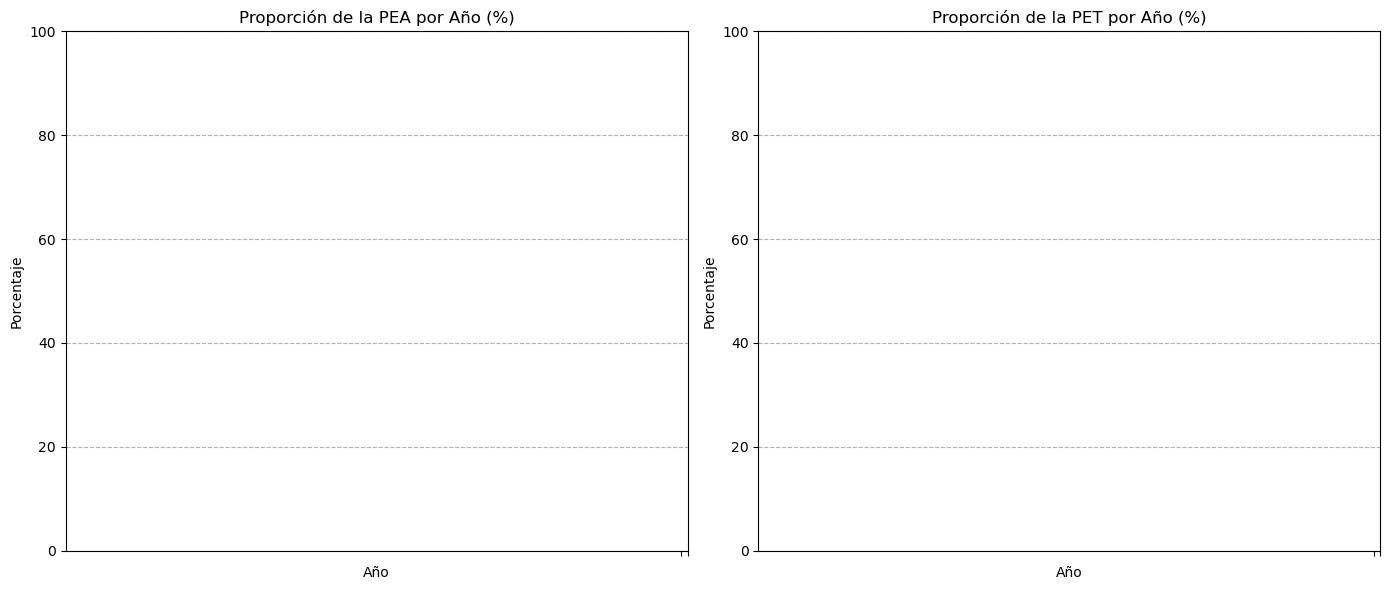


Proporción de la PEA por año (%):
 ANO4
2004     0.000000
2024    46.877169
Name: PEA, dtype: float64

Proporción de la PET por año (%):
 ANO4
2004    66.237745
2024    67.029840
Name: PET, dtype: float64


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asumiendo que ya tienes el DataFrame 'df_combinado' creado ---

# --- Crear la columna PEA ---
def es_pea(estado):
    if estado in [1, 2]:
        return 1
    else:
        return 0

df_combinado['PEA'] = df_combinado['ESTADO'].apply(es_pea)
pea_proporcion_anual = df_combinado.groupby('ANO4')['PEA'].mean() * 100

# --- Crear la columna PET ---
def es_pet(edad):
    if pd.notna(edad) and 15 <= edad <= 65: # Manejar posibles NaN en edad
        return 1
    else:
        return 0

df_combinado['PET'] = df_combinado['CH06'].apply(es_pet)
pet_proporcion_anual = df_combinado.groupby('ANO4')['PET'].mean() * 100

# --- Gráficos PEA y PET ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de PEA
sns.barplot(x=pea_proporcion_anual.index, y=pea_proporcion_anual.values, hue=pea_proporcion_anual.index, ax=axes[0], palette="viridis", legend=False)
axes[0].set_title("Proporción de la PEA por Año (%)")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Porcentaje")
axes[0].set_xticks([2004, 2024])
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--')

# Gráfico de PET
sns.barplot(x=pet_proporcion_anual.index, y=pet_proporcion_anual.values, hue=pet_proporcion_anual.index, ax=axes[1], palette="mako", legend=False)
axes[1].set_title("Proporción de la PET por Año (%)")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Porcentaje")
axes[1].set_xticks([2004, 2024])
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("\nProporción de la PEA por año (%):\n", pea_proporcion_anual)
print("\nProporción de la PET por año (%):\n", pet_proporcion_anual)